In [31]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import os
import json
import csv

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%pylab inline

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv > murdfire.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  72100      0 --:--:-- --:--:-- --:--:-- 72703


In [33]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mbh329/PUIdata


In [34]:
!mv murdfire.csv $PUIDATA

# Getting  Country and homicide Data

In [35]:
countryhom_df = pd.read_csv('%s/murdfire.csv'%os.getenv("PUIDATA"))

In [36]:
countryhom_df.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [37]:
countryhom_df.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [38]:
countryhom1_df = countryhom_df.drop(['ISO code', 'Source', '% of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Average firearms per 100 people', 'Rank by rate of ownership',
       'Average total all civilian firearms'],
      axis=1)

# kept 'Country/Territory', 'Number of homicides by firearm', '

# Getting GUNS and Number of Mass shootings DATA

In [39]:
gunmass_df = pd.read_csv('%s/murdfire1.csv'%os.getenv("PUIDATA"))

In [40]:
gunmass_df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


# Merge Mass shootings and firearms df 

In [41]:

gunmerge_df = countryhom1_df.merge(gunmass_df, right_on="Country", left_on="Country/Territory")
gunmerge_df.drop(['Country'], axis=1, inplace=True) #drop country 
gunmerge_df

,Country/Territory,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,30.0,15.0,4
1,Austria,18.0,30.4,1
2,Belgium,70.0,17.2,2
3,Canada,173.0,30.8,4
4,Denmark,15.0,12.0,0
5,Finland,24.0,45.3,2
6,France,35.0,31.2,6
7,Germany,158.0,30.3,7
8,Greece,29.0,22.5,0
9,Hungary,7.0,5.5,0


# Getting Population Data

In [42]:
wbpop_df = pd.read_excel('%s/API_SP.POP.TOTL_DS2_en_excel_v2_10224790.xls'%os.getenv("PUIDATA"), 
                        skiprows=3)

In [43]:
wbpop_df = wbpop_df[["Country Name", "2017"]]
wbpop_df.head()
#wbpop.rename(index)
#wbpop_df.drop([0,1])
#dbpop.set-index()

,Country Name,2017
0,Aruba,105264.0
1,Afghanistan,35530081.0
2,Angola,29784193.0
3,Albania,2873457.0
4,Andorra,76965.0


In [44]:
wbgdp_df = pd.read_excel('%s/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_10224715.xls'%os.getenv("PUIDATA"), 
                        skiprows=3) 

# Getting GDP Data

In [45]:
wbgdp_df = wbgdp_df[["Country Name", "2017"]]
wbgdp_df.head()


,Country Name,2017
0,Aruba,NaN
1,Afghanistan,2.081530e+10
2,Angola,1.242094e+11
3,Albania,1.303935e+10
4,Andorra,3.012914e+09


In [46]:
wbmerge_df = wbpop_df.merge(wbgdp_df, right_on="Country Name", left_on="Country Name") #merge gdp and pop df

In [47]:
wbmerge_df.rename(columns={'2017_x': 'pop', '2017_y': 'gdp'}, inplace=True)

In [48]:
wbmerge_df

,Country Name,pop,gdp
0,Aruba,1.052640e+05,NaN
1,Afghanistan,3.553008e+07,2.081530e+10
2,Angola,2.978419e+07,1.242094e+11
3,Albania,2.873457e+06,1.303935e+10
4,Andorra,7.696500e+04,3.012914e+09
5,Arab World,4.144919e+08,2.591047e+12
6,United Arab Emirates,9.400145e+06,3.825751e+11
7,Argentina,4.427104e+07,6.375904e+11
8,Armenia,2.930450e+06,1.153659e+10
9,American Samoa,5.564100e+04,NaN


# merging into one dataframe 

In [64]:
gunecon_df = wbmerge_df.merge(gunmerge_df, right_on='Country/Territory', left_on='Country Name')
gunecon_df.rename(columns={'Number of mass shootings (1983-2013)': '# of mass shootings', 'Country Name': 'Country'}, inplace=True)

In [65]:
gunecon_df.head()

,Country,pop,gdp,Country/Territory,Number of homicides by firearm,Guns per 100 inhabitants,# of mass shootings
0,Australia,24598933.0,1.323421e+12,Australia,30.0,15.0,4
1,Austria,8809212.0,4.165957e+11,Austria,18.0,30.4,1
2,Belgium,11372068.0,4.926813e+11,Belgium,70.0,17.2,2
3,Canada,36708083.0,1.653043e+12,Canada,173.0,30.8,4
4,Switzerland,8466017.0,6.788873e+11,Switzerland,57.0,45.7,2


# exploration
# plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

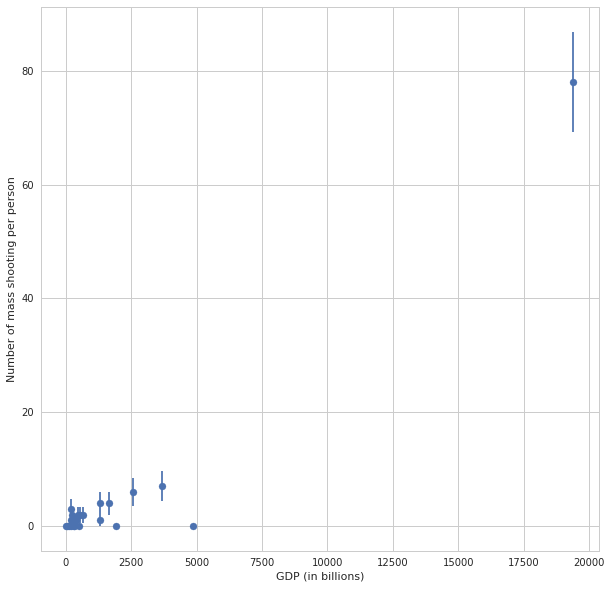

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [66]:


fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(gunecon_df.gdp / 1e9, gunecon_df['# of mass shootings'])
ax.errorbar(gunecon_df.gdp / 1e9, gunecon_df['# of mass shootings'], 
            yerr = np.sqrt(gunecon_df['# of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


#prof bianco code 




### plot the average number of civilian fire arms per person
first without errors, then with errors. are there points that look like outliers?

In [67]:
gunecon_df['shootingspp'] = gunecon_df["# of mass shootings"] / gunecon_df['pop'] * 1e3 
#code from bianco

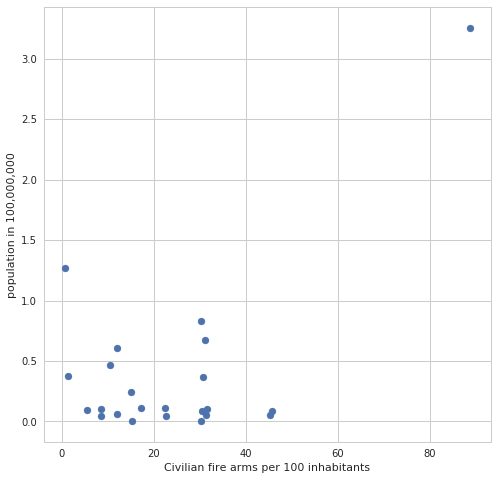

In [68]:
fig = pl.figure(figsize=(8,8)) 
ax = fig.add_subplot(111)


scatter = ax.scatter(gunecon_df['Guns per 100 inhabitants'], gunecon_df['pop'] /1e8)


#ax.errorbar(gunecon_df.gdp / 1e9, gunecon_df['# of mass shootings'], 
#            yerr = np.sqrt(gunecon_df['# of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Civilian fire arms per 100 inhabitants")
ax.set_ylabel("population in 100,000,000")
ax.set_ylim()
pl.show()
print()


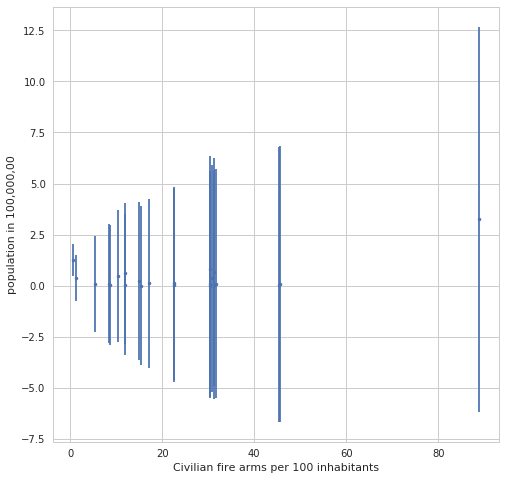

In [69]:
fig = pl.figure(figsize=(8,8)) 
ax = fig.add_subplot(111)

#scatter = ax.scatter(gunecon_df['shootingspp'] * 1e3, gunecon_df['Guns per 100 inhabitants'])
ax.errorbar(gunecon_df['Guns per 100 inhabitants'], gunecon_df['pop'] / 1e8, 
            yerr = np.sqrt(gunecon_df['Guns per 100 inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("Civilian fire arms per 100 inhabitants")
ax.set_ylabel("population in 100,000,00")
ax.set_ylim()
pl.show()
print ( )

Figure: The figure here is meant to show the error variance but I don't believe it is correct. This would mean that there is a huge variance in the data which I don't think would be acceptable for any study. Unsure how to mitigate this issue. 

Text(0,0.5,'# of countries surveyed')

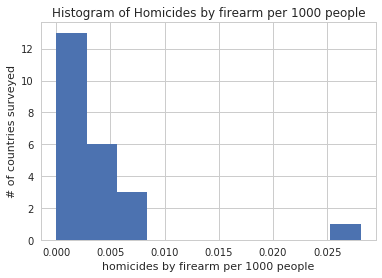

In [70]:
fig = pl.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.hist(gunecon_df['Number of homicides by firearm'] / gunecon_df['pop'] * 1000)
ax.set_title('Histogram of Homicides by firearm per 1000 people')
ax.set_xlabel('homicides by firearm per 1000 people');
ax.set_ylabel('# of countries surveyed')




figure 4: we see that the USA has a higher rate of homicides by firearm per 1000 people than every other country listed. This is consistent with the general view of americans and guns.

Text(0,0.5,'GDP')

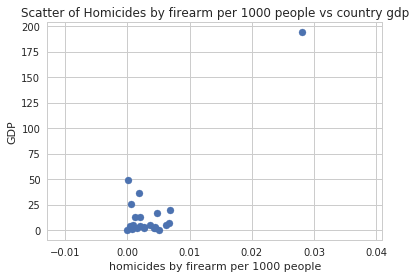

In [86]:
fig = pl.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.scatter(gunecon_df['Number of homicides by firearm'] / gunecon_df['pop'] * 1000, gunecon_df.gdp / 1e11,)
ax.set_title('Scatter of Homicides by firearm per 1000 people vs country gdp')
ax.set_xlabel('homicides by firearm per 1000 people');
ax.set_ylabel('GDP')



Figure: The outlier in this plot is very apparently the USA which has the highest GDP and also the highest rates of homicide by firearms. Countries have very low homicide rates relative to the USA.

# plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

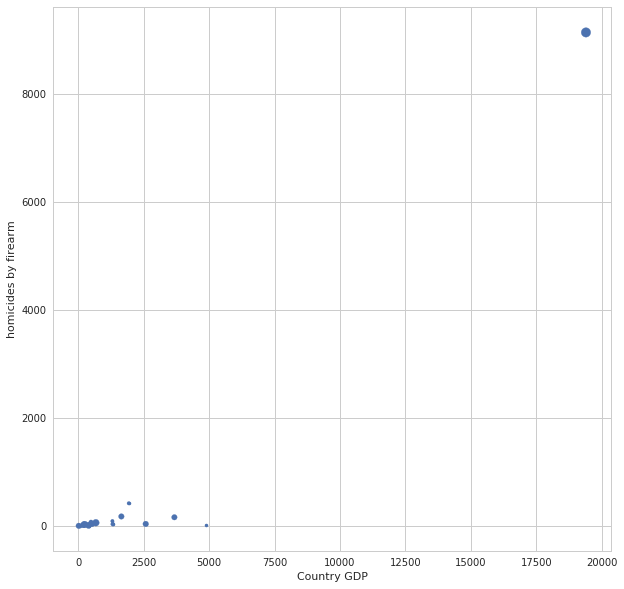

In [87]:
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(gunecon_df.gdp / 1e9, gunecon_df['Number of homicides by firearm'], gunecon_df['Guns per 100 inhabitants'],)
ax.errorbar(gunecon_df.gdp / 1e9, gunecon_df['Number of homicides by firearm'], 
           yerr = np.sqrt(gunecon_df['Guns per 100 inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("Country GDP")
ax.set_ylabel("homicides by firearm")
ax.set_ylim()
pl.show()
print()

#x = (gunecon_df.gdp / 1e9, gunecon_df['Number of homicides by firearm'])
#y = (gunecon_df['Guns per 100 inhabitants'])
#ax.scatter(x[np.abs(y)<8000], y[np.abs(y)<8000], marker="s", color="#2e91be")
#ax.scatter(x[np.abs(y)>=8000], y[np.abs(y)>=8000], marker="d", color="#d46f9f")


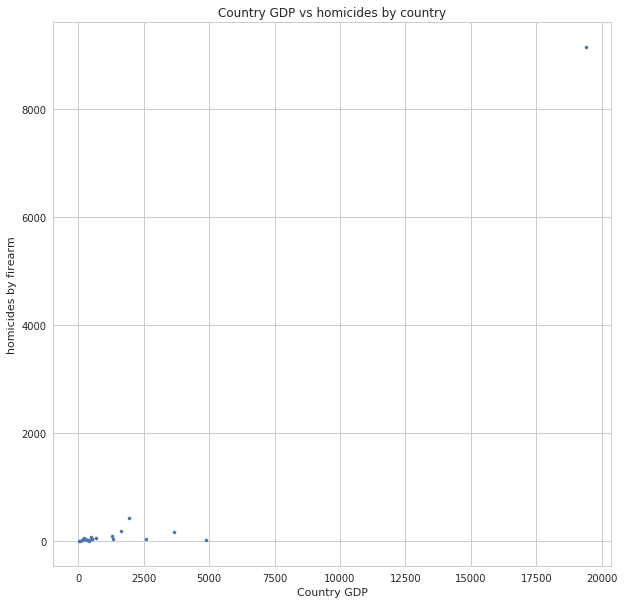

In [58]:
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
ax.errorbar(gunecon_df.gdp / 1e9, gunecon_df['Number of homicides by firearm'], 
        yerr = np.sqrt(gunecon_df['Guns per 100 inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("Country GDP")
ax.set_ylabel("homicides by firearm")
ax.set_title('Country GDP vs homicides by country')
ax.set_ylim()
pl.show()


Figure: This shows the Country GDP plotted against homicides by firearms. It shows that the USA is once again the outlier in the data set. You can see the USA in the far right corner of the graph.

# plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

In [59]:
gunecon_df.columns

Index(['Country Name', 'pop', 'gdp', 'Country/Territory',
       'Number of homicides by firearm', 'Guns per 100 inhabitants',
       '# of mass shootings', 'shootingspp'],
      dtype='object')

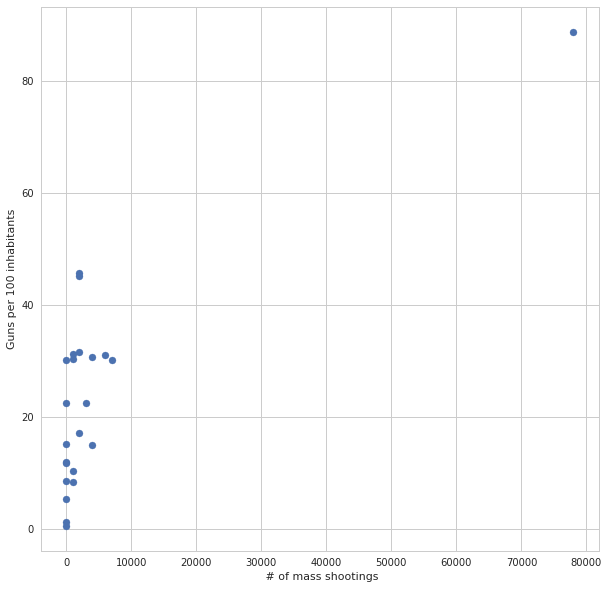

In [63]:
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(gunecon_df["# of mass shootings"] * 1e3, gunecon_df['Guns per 100 inhabitants'])
#ax.errorbar(gunecon_df.gdp / 1e9, gunecon_df['Number of homicides by firearm'], 
          # yerr = np.sqrt(gunecon_df['Guns per 100 inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel(" # of mass shootings")
ax.set_ylabel("Guns per 100 inhabitants")
ax.set_ylim()
pl.show()
print()

Figure: Displays the # of mass shootings vs guns per 100 people. The data is more evenly distributed but the USA is an outlier; this plot shows that countries have more guns per 100 inhabitants but mass shootings remain low in those countries. The USA has a high rate of guns per 100 inhabitants AND a high rate of mass shootings.